In [2]:
# 기본 작업 경로 설정
import os
notebook_path = os.path.abspath("project_3_git/code/3_lm_t5.ipynb")
notebook_dir = os.path.dirname(notebook_path)
os.chdir(notebook_dir)

# 현재 작업 디렉토리 출력
print("Current working directory: ", os.getcwd())

Current working directory:  /mnt/e/py_data/project_3_git/code



0: 640x512 1 person, 1 dog, 124.3ms
Speed: 2.8ms preprocess, 124.3ms inference, 7.2ms postprocess per image at shape (1, 3, 640, 512)


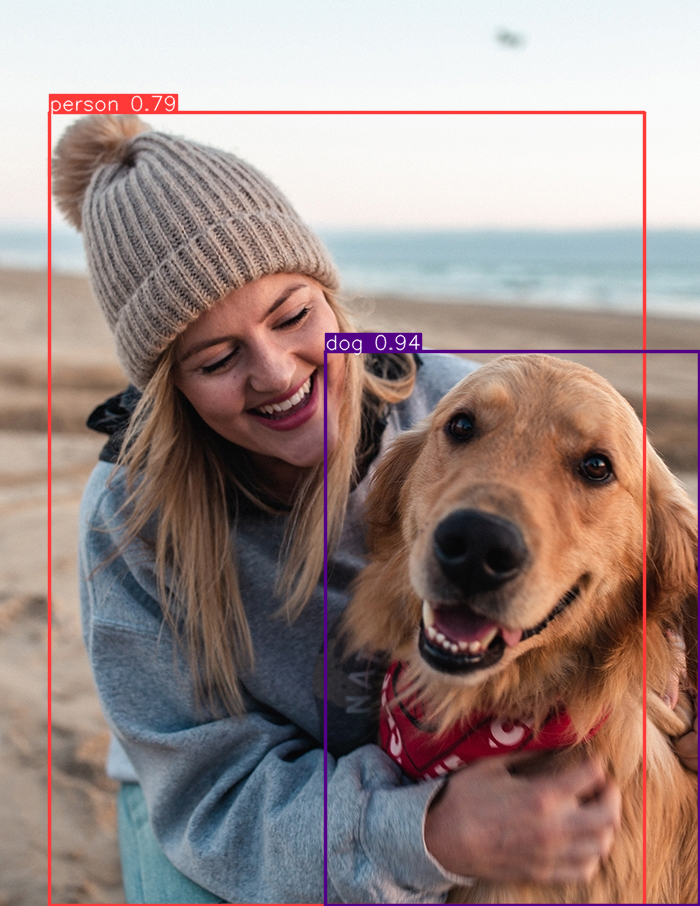

In [20]:
import cv2
from ultralytics.models import YOLOv10

test_image = cv2.imread('../test.png')

# 훈련된 모델 불러오기

model_from_pret = YOLOv10.from_pretrained('jameslahm/yolov10m')

model_from_pret(test_image)[0].show()


0: 512x416 1 happy, 21.4ms
Speed: 2.6ms preprocess, 21.4ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 416)


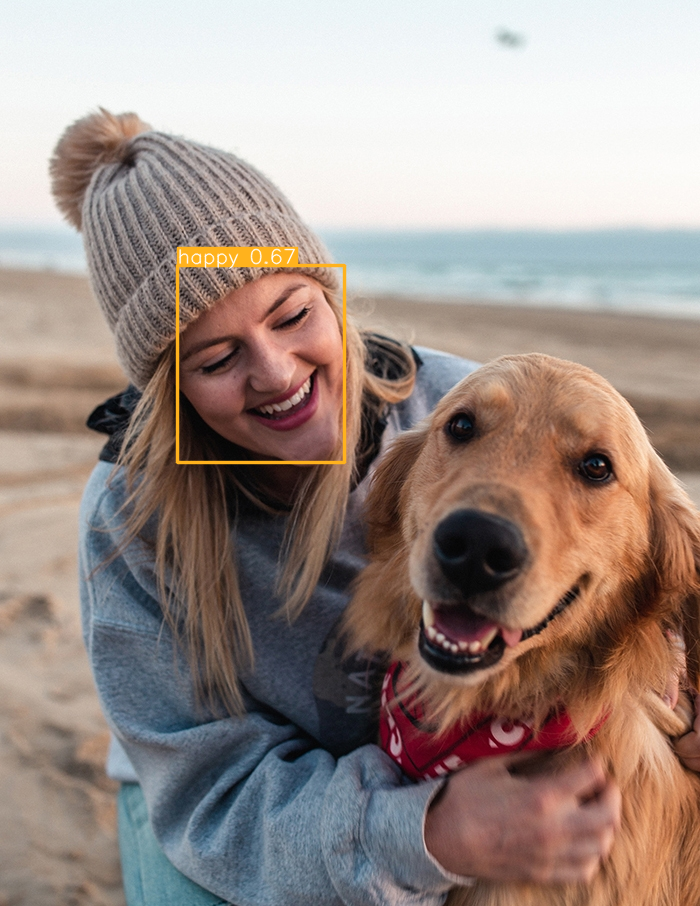

In [21]:
import cv2
from ultralytics.models import YOLOv10

test_image = cv2.imread('../test.png')

# 훈련된 모델 불러오기

model_transfered = YOLOv10('../yolov10/runs/detect/train1/weights/last.pt')

model_transfered(test_image)[0].show()

In [24]:
result = model_transfered(test_image)[0]


0: 512x416 1 happy, 32.3ms
Speed: 3.2ms preprocess, 32.3ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 416)


In [25]:
detections = result.boxes
emotion_mapping = {
    0 : '분노',
    1 : '슬픔',
    2 : '공포',
    3 : '기쁨',
}

In [26]:
text_intput = [emotion_mapping[int(i)] for i in detections.cls]

text_intput_text = ''
for i in text_intput:
    text_intput_text +=i + ','

text_intput_text = text_intput_text[:-1]

In [27]:
text_intput_text

'기쁨'

In [7]:
from transformers import T5TokenizerFast, T5ForConditionalGeneration
import torch

# 저장된 모델과 토크나이저 로드
model_save_path = '../model_follow_up/t5/model/'
tokenizer_save_path = '../model_follow_up/t5/model/tokenizer/'

model = T5ForConditionalGeneration.from_pretrained(model_save_path)
tokenizer = T5TokenizerFast.from_pretrained(tokenizer_save_path)

# 테스트 입력
test_input = text_intput_text
# 입력 토큰화
input_ids = tokenizer.encode(test_input, return_tensors='pt')

# 모델 예측
with torch.no_grad():
    outputs = model.generate(input_ids, max_length=50, num_beams=4, early_stopping=True)

# 예측 결과 디코딩
predicted_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(f"테스트 입력: {test_input}")
print(f"모델의 예측: {predicted_text}")


테스트 입력: 기쁨
모델의 예측: 아울렛에서 기쁜 표정이 높은 곳에서의 행복을 더해주네요!
